# Notebook 1: Introduction and explanation of main research points
### Recognizing High-redshift Galaxy Mergers with Convolutional Neural Networks using DeepMerge simulated data with an application on real-world data

*Ema Donev, 2023.*

In this notebook you will find all the information about galaxy mergers, the importance of this project, redshifting galaxies and neural networks in reference to *DeepMerge: Classifying High-redshift Merging Galaxies with Deep Neural Networks by Ćiprijanović A., Snyder G.F., Nord B. and Peek J. E. G., 2020.*

## Section 1: Importance of project

Whenever people think about research in astrophysics, they imagine scientists observing the sky with a telescope, noting their observations, and in a flash, they discover wonders about the universe. However, most of the astrophysics done today is an analysis of data that can be collected by satellites and telescopes. 

Currently, in the world, there is more data than ever, and it all cannot be analyzed by hand. As our data catalogs with labels grow, computers can do the job for us more quickly and efficiently, saving time for scientists who can discover new things based on that data.

One of today's mysteries in astrophysics is the evolution of galaxies. Galaxy morphology and merging galaxies give us valuable clues into their past and evolution. We do not have many pictures of merging galaxies made by telescopes for our computers to train efficiently on them to make predictions about future photographs from promising telescopes like JWST. So using simulated images as part of the DEEPMERGE project helps train a model so it can be readily applied to real images. 

The goals of this project are:
1. To create an architecture designed to do the binary classification of a galaxy or a galaxy merger from simulated images and compare them to the DEEPMERGE model based on pristine and noisy data.
2. To find real-world data containing pictures of galaxies and galaxy mergers and test the efficiency of our model based on three different scenarios: only testing the model on real images, fine-tuning the model on real images and then testing it, or training and testing the model on real images. 
3. To compare the results from simulated images with the real images.

## Section 2: Galaxy morphologies and interactions

Galaxies are large systems of stars, stellar remnants, clouds of gas and dust and dark matter all kept together by gravity. In the center of galaxies are supermassive black holes, an example being Sagittarius A* which we can find in the center of our galaxy. 

We usually classify galaxies by their morphology or their shape (and not color). The most common is the Edwin Hubble classification system illustrated in Figure 1:

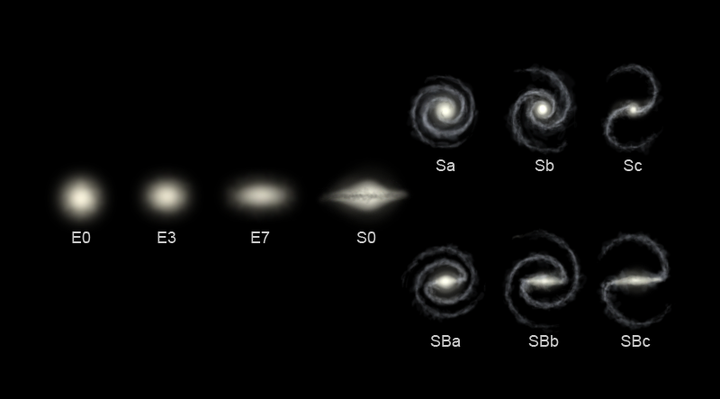

In [1]:
from IPython.display import Image
Image(filename="../images/morphology of galaxies.png")

*Figure 1: morphology of galaxies based on the Hubble classification system*

**Elliptical galaxies** are galaxies with little visible gas and dust. Massive and hot stars are not present, which shows that elliptical galaxies are very old. They have varying eccentricities, ranging from E0 to E7. Elliptical galaxies are typically redder than spiral galaxies, although there are notable blue ellipticals.

**Spiral galaxies** are galaxies with a disk and visible spirals which originate in the nucleus of a galaxy. Spiral galaxies have many young stars and are generally bluer than ellipticals due to a high star forming rate (SFR). Spiral galaxies can also be **barred spiral galaxies**, meaning that their nucleus is elongated and not oval. 

**Lenticular galaxies** are galaxies which have a bulging nucleus and disk, but no hot stars nor visible gas and dust.

**Irregular galaxies** are galaxies without any inherent structure.

### Galaxy interactions

There are 3 different types of interactions of galaxies.
1. **Galaxies pass by each other**: 2 passing galaxies interact by distorting one another's structure due to gravity and tidal forces.

2. **Galactic canibalism**: a larger galaxy envelops a smaller galaxy and its contents become part of the larger galaxy. This way a galaxy can become extremely large by taking over its neighbouurs. 

3. **Galaxy mergers**: when 2 galaxies violently collide and ignite a sudden burst in star formation as the gas and dust collide with each other. Figure 2 shows an example of a galaxy merger.

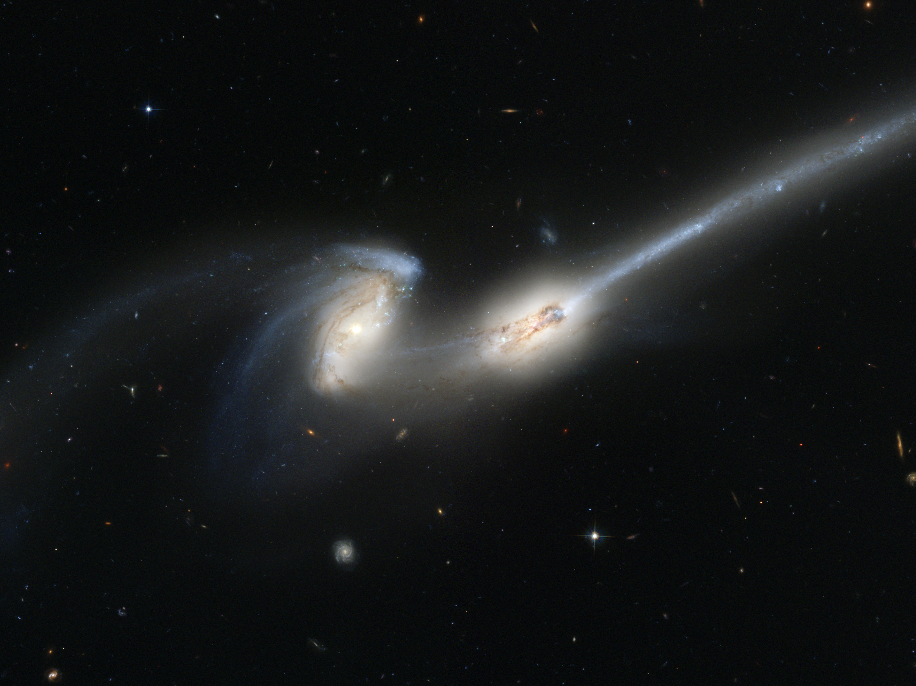

In [3]:
Image(filename="../images/galaxy_merger.png")

*Figure 2: galaxy merger in the unvierse*

## Section 3: neural networks and Convolutional neural networks

**Neural networks**, are in essence, large mathematical functions whose goal is to try and fit a curve into input data with their architecture in order to precisely determine output values. A model "trains" with a *training set of data*, where it trains itself to optimize its parameters so it can be more precise. While training, it tests itself on *validation data*, making sure it is not memorizing the data or **overfitting**. Finally, after the model is done training and we are confident it knows enough, we test it on *test data* which is the final measure of its accuracy and how well it can perform.

##### Step 1: setting the parameters to random numbers and fitting the input data
The first step is to randomly draw a line through the input data. Being random, parameters are not close to their optimal value for the best fit. 

##### Step 2: calculating the loss
The next step is to calculate the loss, or how far away the model's predictions are from the optimal parameters in our training input data. A function which we use to calculate how far away the first guess is from the true values is called the **loss function**. Now that we have a loss, our goal is *to minimize the loss as much as possible during the training process*. 

##### Step 3: Gradient descent
The third step is to point the model in the correct direction, or towards the minimum of the loss function. This is done by calculating the **gradient**, or the derivative of every parameter. In other words, we are calculating that if we change a parameter by some unit, how will the loss function change? By doing this for every parameter, the model points itself in the direction of the minimum of the loss function. This process over the entire training loop is called **gradient descent**.

##### Step 4: optimizing the parameters
After determining the right direction, all the parameters change by a tiny amount, the **learning rate**, which tells the model how quickly to descend to the minimum of the loss function. 

After the 4th step, the whole process is repeated again from step 2 to step 4, untill we stop the model's training loop by setting a number of epochs. An **epoch** is one sweep through the entire desired dataset. Due to technical and practical reasons, the data is grouped into **batches**, or smaller subsets of the original dataset which help the model learn faster and better. 

#### Convolutional neural networks

Convolutional neural networks or CNN's are neural networks tailored for recognizing images. 

Each image is made of **pixels**, and each pixel has a range from 0 to 255. If we would try and write down an image, we would write a *matrix of pixels*. A matrix is a mathematical object with rows and columns and it is used for many operations, especially with images. 

Every CNN contains an **architecture**. An **architecture** is a technical specification of a model, composed of layers where many functions used to manipulate images are found. **Forward pass** is a process where the input data is passed through the architecture and an output is produced. Between each layer it is very important to *use activation functions*. These functions add non-linearity to the model, enabling the function of neural networks!

Since this project is a **binary classification**, there are really only 2 types of activation functions we are going to use. Those are *sigmoid and ReLU*. ReLU is used between **convolutions**, and a sigmoid function is used to tranform input values into a range between 0 and 1, effectively arranging the output as a percentage of a binary classification. Figure 3 shows the activation functions graphed.

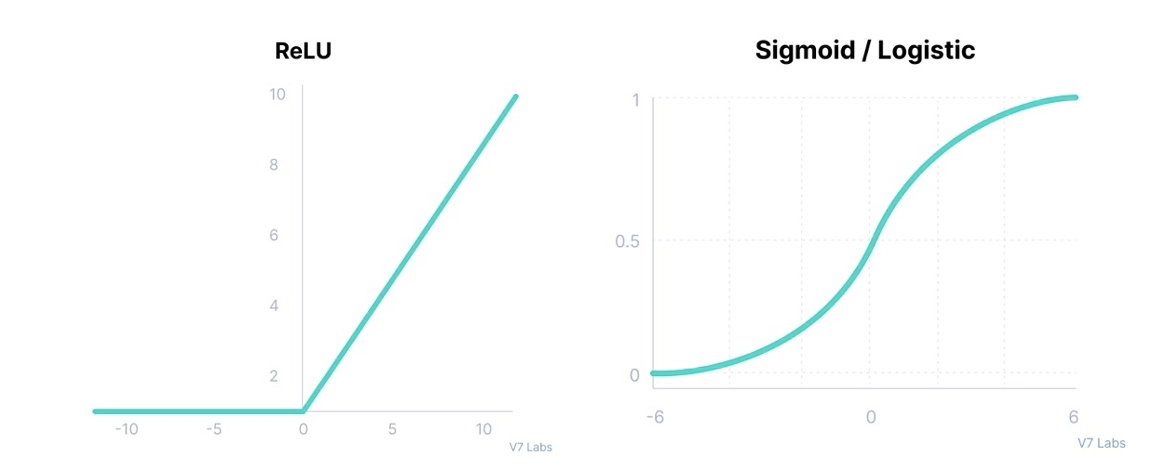

In [4]:
Image(filename="../images/act_func.png")

*Figure 3: ReLU and Sigmoid activation functions*

##### Convolution, stride and padding

The most elementary aspect of a CNN is a process called **convolution**. A convolution uses a **kernel** or a small matrix, which when passed through the pixels of an image amplifies features on that image like vertical and horizontal edges, etc. Figure 4 shows how a convolution looks like.

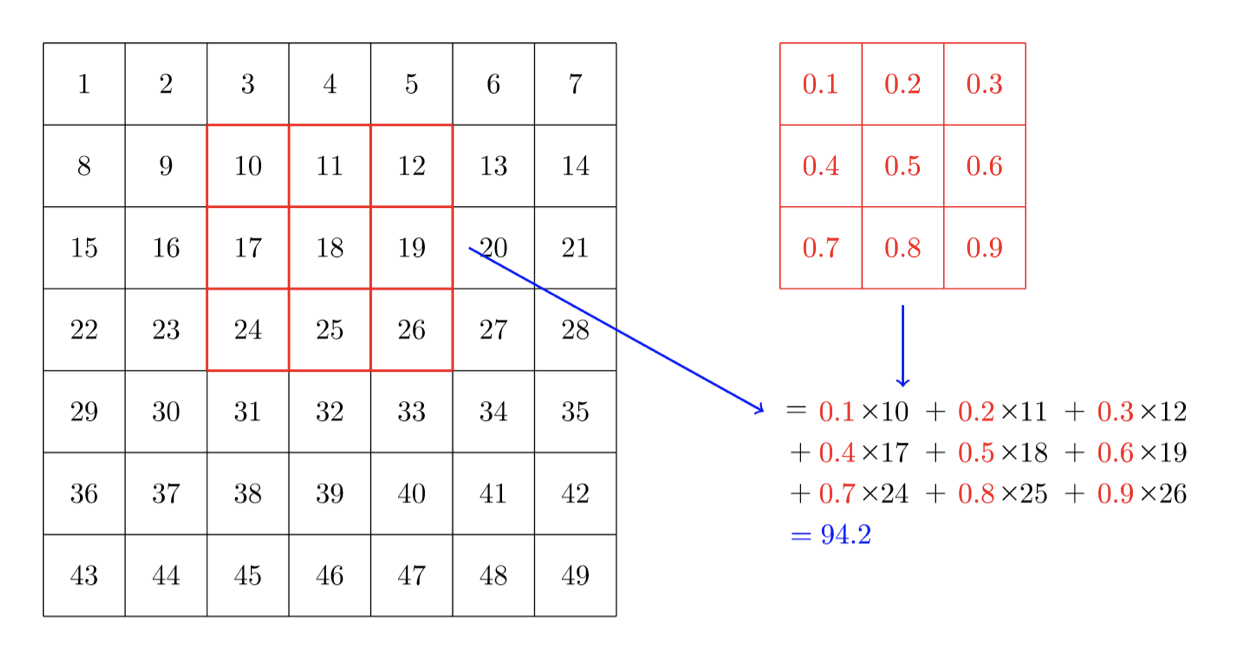

In [5]:
Image(filename="../images/conv.png")

*Figure 4: convolution*